In [43]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import model_selection, tree
from sklearn.preprocessing import LabelEncoder

In [6]:
dataset = pd.read_csv("/home/aswnss/Coding/Python/Machine-Learning-Projects/ras ml/datasets/titanic.csv",sep=",")
dataset.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [8]:
dataset.groupby('Survived').mean()

PassengerId    Pclass        Age     SibSp     Parch       Fare
Survived                                                                 
0          447.016393  2.531876  30.626179  0.553734  0.329690  22.117887
1          444.368421  1.950292  28.343690  0.473684  0.464912  48.395408

<AxesSubplot:xlabel='Sex'>

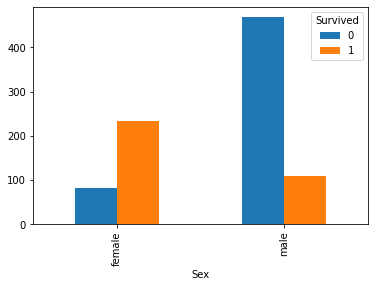

In [9]:
pd.crosstab(dataset.Sex, dataset.Survived).plot(kind='bar')

<AxesSubplot:xlabel='Embarked'>

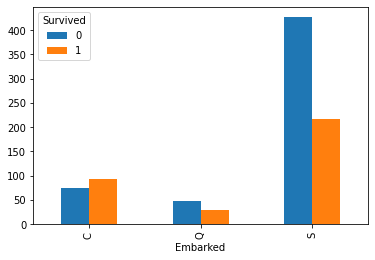

In [11]:
pd.crosstab(dataset.Embarked, dataset.Survived).plot(kind='bar')

### Column to be dropped
* Name
* PassengerId


In [ ]:
dataset = dataset.drop(['PassengerId','Name'],axis=1)

In [17]:
dataset

Survived  Pclass     Sex   Age  SibSp  Parch            Ticket     Fare  \
0           0       3    male  22.0      1      0         A/5 21171   7.2500   
1           1       1  female  38.0      1      0          PC 17599  71.2833   
2           1       3  female  26.0      0      0  STON/O2. 3101282   7.9250   
3           1       1  female  35.0      1      0            113803  53.1000   
4           0       3    male  35.0      0      0            373450   8.0500   
..        ...     ...     ...   ...    ...    ...               ...      ...   
886         0       2    male  27.0      0      0            211536  13.0000   
887         1       1  female  19.0      0      0            112053  30.0000   
888         0       3  female   NaN      1      2        W./C. 6607  23.4500   
889         1       1    male  26.0      0      0            111369  30.0000   
890         0       3    male  32.0      0      0            370376   7.7500   

    Cabin Embarked  
0     NaN        S  
1     C85        C  
2     NaN        S  
3    C123        S  
4     NaN        S  
..    ...      ...  
886   NaN        S  
887   B42        S  
888   NaN        S  
889  C148        C  
890   NaN        Q  

[891 rows x 10 columns]

In [19]:
dataset.isna().sum() #since there are many null values in Age , Cabin and *Embarked

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [20]:
dataset = dataset.drop(['Age','Cabin','Embarked','Ticket'],axis=1)

In [21]:
X = dataset.drop(['Survived'],axis=1)
y = dataset.Survived

In [29]:
label_encode = LabelEncoder()
X["Sex_n"] = label_encode.fit_transform(X.Sex)
X = X.drop('Sex',axis=1)

In [49]:
Laura = tree.DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
Christopher = RandomForestClassifier(n_estimators = 100)

In [42]:
max = -1
for _ in range(100):
    x_train,x_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.4)
    Laura.fit(x_train,y_train)
    acc = Laura.score(x_test,y_test)
    if acc > max:
        max = acc
print(max)

0.8431372549019608


In [50]:
max = -1
for _ in range(100):
    x_train,x_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.4)
    Christopher.fit(x_train,y_train)
    acc = Christopher.score(x_test,y_test)
    if acc > max:
        max = acc
print(max)

0.8431372549019608
